# Project : Test a Perceptual Phenomenon

## Analyzing the Stroop Effect

In this project we will investigate a classic phenomenon from experimental psychology known as the [Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect​). 

We will begin by learning a little bit about the experiment, creating a hypothesis regarding the outcome of the task, then going through the task ourselves. We will look at data collected from others who have already done this task, following which we will conduct our own statistical analysis. Finally, we will interpret our results in terms of our hypotheses.

### Q1. What is the independent variable? What is the dependent Variable?

- **Independent Variabe:** The 'congruency' or 'incongruency' of words is the independent variable.
- **Dependent Variable:**  The time it takes to view and complete the test.

### Q2.  What is an appropriate set of hypotheses for this task? Specify the null and alternative hypotheses based on what you think the researchers might be interested in. Justify your choices.



Our Null and Alternate Hypotheses are:

- **Null Hypothesis:** The time taken to complete the test is *NOT* influenced by congruency. Therefore:

$$ H_0: \mu_{incongruent} \leq \mu_{congruent} $$

- **Alternate Hypothesis:** The time taken for incongruent words is *GREATER* than the time taken for congruent words, thus:

$$ H_1: \mu_{incongruent} \gt \mu_{congruent} $$

_Here, $ \mu $ is the population mean._

- **Statistical Test: Paired T-Test** 
    - The paired sample t-test, sometimes called the dependent sample t-test, is a statistical procedure used to  determine whether the mean difference between two sets of observations is zero.
    - A t-test is used because the population variance is unknown and the sample size is less than 30.
    

### Q3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
%matplotlib inline
sns.set_style('darkgrid')


In [2]:
# Loading data into the DataFrame.
df = pd.read_csv('./stroopdata.csv')

In [3]:
# Displaying 5 rows of the DataFrame.
df.head(5)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


**Analyzing measures of central tendency and variability:**

Calculating the necessary means, medians and standard deviations.

In [4]:
# Calculating means
mean_c = round(df['Congruent'].mean(), 2)
mean_ic = round(df['Incongruent'].mean(), 2)
print("The mean of congruent words is: {}\n"
      "The mean of incongruent words is: {}".format(mean_c, mean_ic))

The mean of congruent words is: 14.05
The mean of incongruent words is: 22.02


In [5]:
# Calculating medians
med_c = round(df['Congruent'].median(), 2)
med_ic = round(df['Incongruent'].median(), 2)
print("The median of congruent words is: {}\n"
      "The median of incongruent words is: {}".format(med_c, med_ic))

The median of congruent words is: 14.36
The median of incongruent words is: 21.02


In [6]:
# Calculating standard deviations
std_c = round(df['Congruent'].std(), 2)
std_ic = round(df['Incongruent'].std(), 2)
print("The standard deviation of congruent words is: {}\n"
      "The standard deviation of incongruent words is: {}".format(std_c, std_ic))

The standard deviation of congruent words is: 3.56
The standard deviation of incongruent words is: 4.8


### Q4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

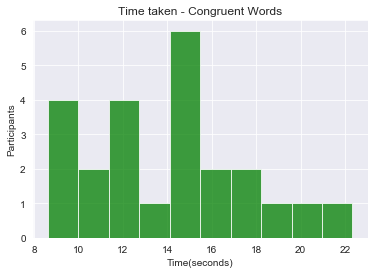

In [7]:
plt.hist(df['Congruent'], facecolor='g', alpha=0.75)
plt.xlabel("Time(seconds)")
plt.ylabel("Participants")
plt.title("Time taken - Congruent Words");

**Observations:** In this histogram, we can observe that 6 participants, being the largest number, took between 14 and 16 seconds to complete the test for congruent words. The sample above can be said to have a normal distribution. 

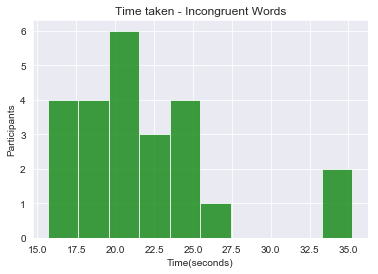

In [8]:
plt.hist(df['Incongruent'], facecolor='g', alpha=0.75)
plt.xlabel("Time(seconds)")
plt.ylabel("Participants")
plt.title("Time taken - Incongruent Words");

**Observations:** In this histogram, we can observe that 6 participants, the largest number, took approximately 20 seconds to complete the test for incongruent words. What is interesting to note is that 2 participants, as the outliers in this sample, took more than 33 seconds to complete the same test. Thus, this plot is right-skewed.

### Q5. Perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations?

As mentioned in Q2, the dependent and paired T-Test will be used as our statistical test.

- **Confidence Level:** For this test, we will establish a confidence level of 99%.
- **Degrees of Freedom:** Since the sample size is 24, then the degree of freedom will be (n-1) i.e. 23.
- **Point Estimate:** The point estimate is the difference of means for congruent and incongruent words i.e. 22.02 - 14.05 = 7.97

In [9]:
# Calculate the T-Critical value for a 99% confidence level
print("T-Critical Value:", t.ppf(.99, 23))

T-Critical Value: 2.4998667394943976


In order to determine the standard deviation of differences, we will first compute the differences in values in the new column "Difference".

In [10]:
df['Difference'] = df['Congruent'] - df['Incongruent']

In [11]:
# Verifying changes
df.head(5)

,Congruent,Incongruent,Difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


We will now calculate the standard deviation of differences of values in the dataset:

In [12]:
# Standard deviation of differences
print("The standard deviation of differences: ", round(df['Difference'].std(axis=0), 2))

The standard deviation of differences:  4.86


**Calculating T-Statistic:** Now that we have the necessary values, our T-Statistic is:

In [13]:
print("T-Statistic: ", (7.97 / (4.86 / math.sqrt(24))))

T-Statistic:  8.03392314814071


**Results:** It can be observed that our T-Critical value is **2.4998**, which is certainly not equal to our T-Statistic **8.033**.

Thus, with according to the findings above, we will **reject the null hypothesis**. The T-Test confirms the fact that incongruent tests take longer than congruent tests.

### Q6. What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? 

Upon further investigation into the Stroop effect, in a paper from the University of Waterloo, Canada - Colin MacLeod refers to three major explanations which have emerged since John Ridley Stroop first published his seminal work in 1935:

1. "The first of these was Cohen, Dunbar, and McClelland’s parallel distributed processing, or connectionist, model, proposed in 1991. At its core, their theory is a strength theory, designed as it was to capture the training data reported by MacLeod and Dunbar. Processing pathways gain strength with practice, and relative strength determines likelihood and degree of interference. Thus, given our extensive experience with reading, color-word pathways ordinarily are much more strongly connected to color name responses than are color pathways."

2. The second came in 2003 where "Melara and Algom coming from a fundamental perception perspective, proposed that two factors underlie Stroop interference: dimensional imbalance and dimensional uncertainty. Dimensional imbalance reflects how correlated the two dimensions of a stimulus are and how surprising a stimulus is and determines the ease of recovery of a stimulus representation from memory. Dimensional uncertainty reflects how salient a stimulus is, notably how likely or unlikely it is in the context of other(recently presented) stimuli. Together, these two factors determine the success of attentional selection by focusing on salient, surprising, and/or correlated information contained within each dimension and across the two dimensions of a Stroop stimulus. Each influences excitation of targets and inhibition of distractors.Stroop interference occurs both because there is more uncertainty in the colors than in the words and because the words are more salient than the colors."

3. The third, also in 2003, "Roelofs proposed his model of Stroop interference, a model situated in an already implemented model of word production (WEAVER ++) from the psycholinguistic literature. This also can be viewed as a two-factor model, with processing interactions occurring in the system that carries out language production, modulated by a supervisory attentional system that maintains task control. Roelofs posited that different architectures underlie color naming and word reading, with color naming, because it is conceptually driven, requiring an extra step due to colors not being directly connected to their names, unlike words."

It is interesting to note that the Stroop-like effects have been observed in alternate tasks which shine a new light on the cognitive functions of humans. 

In 1998, Baldo, Shimamura and Prinzmetal, from the University of California in Berkely, studied the response-compatibility effects in an arrow-word "Stroop like paradigm" i.e. subjects were asked to respond to either an arrow or a word, while ignoring the other. They observed that "response compatibility played a significant role in generating Stroop-like interference. Robust interference effects were observed when the subjects responded manually to word stimuli (ignoring irrelevant arrows) and when they responded vocally to arrow stimuli (ignoring irrelevant words). Smaller interference effects were observed under response-compatible conditions, namely, responding manually to arrows and vocally to words. In the second experiment, within-dimension displays (e.g., arrow-arrow or word-word displays) yielded a pattern of interference that did not interact with response modality. These findings indicate that both stimulus-response compatibility effects and target-distractor similarity are crucial for understanding Stroop-like interference."

## Sources:

[Paired Sample T-Test - Statistics Solutions](http://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/)

[Stroop Effect - Wikipedia](https://en.wikipedia.org/wiki/Stroop_effect)

[T-Score Vs. Z-Score - Statistics How To](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/)

[Standardized Test Statistic - Statistics How To](https://www.statisticshowto.datasciencecentral.com/standardized-test-statistic/)

[The Stroop Effect - Colin MacLeod - University of Waterloo](http://imbs.uci.edu/~kjameson/ECST/MacLeod_TheStroopEffect.pdf)

[Mapping Symbols to Response Modalities: Interference Effects on Stroop-like Tasks](https://link.springer.com/content/pdf/10.3758/BF03206864.pdf)